In [19]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import os
import glob

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
#simnum = 0
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(25)
njk = int(10)
space = 'rspace'
filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}*.dat'

filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'

#filelist = os.listdir(filedir)
filelist = glob.glob(filedir+filename)
filelist = filelist[:100]
nsim = len(filelist)
print(nsim)

chis = []

# Read all files
for file in filelist:
    data = ascii.read(file)
    chis.append( data['chi'][:-1] )

# Calculate the covariance summation and covariance proper
covsum = np.zeros((rbin,rbin))
chis_mean = np.mean(chis,axis=0)
for i in range(rbin):
    for j in range(rbin):
        for k in range(nsim):
            a = (chis[k][i]-chis_mean[i])
            b = (chis[k][j]-chis_mean[j])
            covsum[i][j] += a*b
# for i in range(rbin):
#     for k in range(nsim):
#         covsum[i]+=(chis[k]-chis_mean)*(chis[k]-chis_mean)
cov = covsum/(nsim-1)


100


IndexError: index 12 is out of bounds for axis 0 with size 12

In [10]:
def compute_mean_cov(summaries):
    mean = np.mean(summaries, axis=0)
    covariance = np.cov(summaries.T)
    inverse_covariance = np.linalg.solve(
        covariance, np.eye(len(covariance), len(covariance))
    )
    return mean, covariance, inverse_covariance
mean, covariance, inverse_covariance = compute_mean_cov(np.array(chis))

def compute_xi2(vector, mean, inverse_covariance):
    return (vector - mean) @ inverse_covariance @ (vector - mean).T

xi2_data = [compute_xi2(fid, mean, inverse_covariance) for fid in np.array(chis)]


In [11]:

# Calculate chi squared
chisq = np.zeros(nsim)
for i in range(nsim):
    a = np.transpose(np.asarray(chis[i])-chis_mean)
    b = (np.asarray(chis[i])-chis_mean)
    c = np.linalg.inv(cov)
    ac = np.dot(a,c)
    chisq[i] = ( np.dot(ac,b) )


### Plot Chi Squared

In [6]:
from scipy import stats

plt.hist(np.asarray(chisq).flatten(),bins=30,color=['C00'],density=True)
#plt.vlines(0.5,0,.6,ls=':',color='k')

dof=rbin
x = np.linspace(np.min(chisq), np.max(chisq))
plt.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

plt.show()


NameError: name 'chisq' is not defined

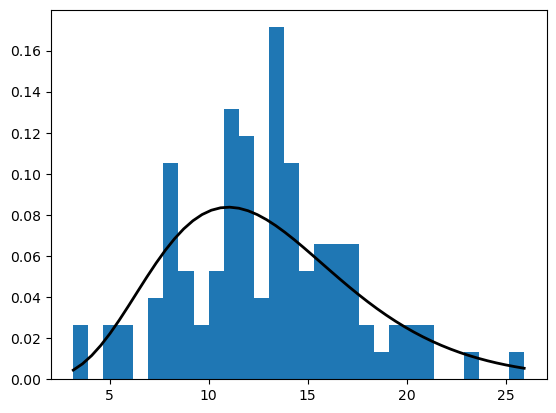

In [12]:
from scipy import stats

plt.hist(xi2_data,bins=30,color=['C00'],density=True)
#plt.vlines(0.5,0,.6,ls=':',color='k')

dof=rbin
x = np.linspace(np.min(xi2_data), np.max(xi2_data))
plt.plot(x, stats.chi2.pdf(x, dof), label=r"$\chi^2$", color="k", linewidth=2)

plt.show()


### Plot Normalized Covariance

In [33]:
normcov = np.zeros(np.shape(covariance))

for i in range(np.shape(covariance)[0]):
    for j in range(np.shape(covariance)[1]):
        normcov[i][j] = covariance[i][j]/np.sqrt(covariance[i][i]*covariance[j][j])


[[ 1.          0.63641553  0.44729069  0.26346985  0.19326234  0.16371093
   0.06723524  0.00558451 -0.0044426  -0.01447366 -0.02346085  0.03630514
   0.01682211]
 [ 0.63641553  1.          0.61216246  0.365284    0.21879466  0.17429829
   0.12842078  0.08343738  0.03563463 -0.01785954  0.00394584 -0.00836607
  -0.00687113]
 [ 0.44729069  0.61216246  1.          0.7500231   0.56843075  0.43450914
   0.32501934  0.2613827   0.24454047  0.21930804  0.18588906  0.11620604
   0.0278734 ]
 [ 0.26346985  0.365284    0.7500231   1.          0.70551151  0.4783188
   0.45960126  0.40116893  0.38684411  0.3504715   0.31540723  0.20688998
   0.14622562]
 [ 0.19326234  0.21879466  0.56843075  0.70551151  1.          0.77855842
   0.68321259  0.59981616  0.53165757  0.47258437  0.36184039  0.19808405
   0.14323529]
 [ 0.16371093  0.17429829  0.43450914  0.4783188   0.77855842  1.
   0.83326408  0.72818446  0.65713377  0.59239534  0.4826881   0.31232268
   0.19545918]
 [ 0.06723524  0.12842078  0.32

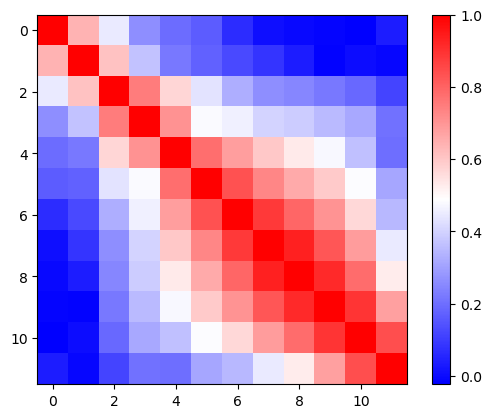

In [60]:
#row_sums = cov.sum(axis=1)
#new_matrix = cov / row_sums[:, np.newaxis]

#trying = np.divide(covariance,np.diag(covariance))

corrm=np.corrcoef(np.array(chis).T)

plt.imshow(corrm,cmap='bwr')
plt.colorbar()
plt.show()

### Plot VPFs

1994


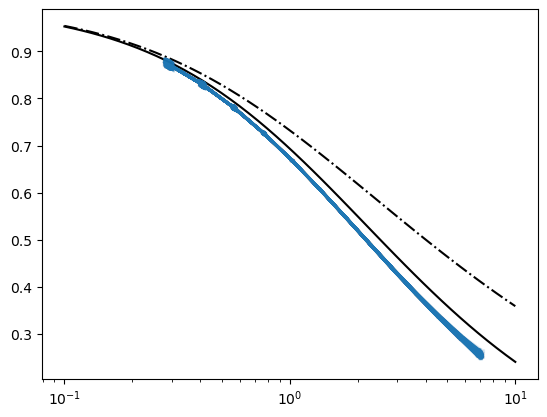

In [30]:
from astropy.io import ascii
import glob

def NB(x):
    return np.log(1+x)/x
def term(x):
    return (np.sqrt(1+2*x)-1)/x

cosm = 'fiducial'
#simnum = 0
ns = int(10000)
rbin = int(13)
rmin, rmax = 3., int(25)
njk = int(10)
filedir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/output/'
space = 'rspace'
filename = f'vpfdata_{rmin}-{rmax}-{rbin}-{njk}-{ns}-{cosm}-{space}*.dat'


#filelist = os.listdir(filedir)
filelist = glob.glob(filedir+filename)
nsim = len(filelist)
print(nsim)

x = np.geomspace(1E-1,1E1,50)
c='k'
plt.plot(x,NB(x),label='Negative Binomial',c=c)
plt.plot(x,term(x),label='Thermodynamical',c=c,ls='-.')

# Read all files
for file in filelist:
    plotdata = ascii.read(file)

    nxi = plotdata['N_mean']*plotdata['xi']
    chi = plotdata['chi']
    chi_std = plotdata['chi_std']
    plt.errorbar(nxi,chi,yerr=chi_std,c='C00',alpha=.1)
plt.xscale('log')
#plt.legend(loc=3)
plt.show()